# Multi-Framework Comparison with DLT

This notebook demonstrates how DLT provides a unified interface across different machine learning frameworks:
- 🔬 **Sklearn** - Traditional machine learning algorithms
- 🧠 **PyTorch** - Deep learning with dynamic graphs
- 🤖 **TensorFlow/Keras** - Production-ready deep learning
- ⚖️ **Performance Comparison** - Speed, accuracy, and resource usage
- 📊 **Best Practices** - When to use each framework

Let's compare these frameworks on the same datasets!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report

# DLT imports
from dlt.core.config import DLTConfig
from dlt.core.pipeline import train, evaluate, predict

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 Multi-Framework Comparison Setup Complete!")

2025-09-29 11:39:51.207682: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


📊 Multi-Framework Comparison Setup Complete!


/home/rlfowler/Documents/myprojects/DLT/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 📋 Dataset Preparation

We'll create both classification and regression datasets to compare frameworks:

In [2]:
# Create classification dataset
print("🎯 Creating Classification Dataset...")
X_class, y_class = make_classification(
    n_samples=5000,
    n_features=50,
    n_classes=4,
    n_informative=40,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.0,
    random_state=42
)

X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Create regression dataset
print("📈 Creating Regression Dataset...")
X_reg, y_reg = make_regression(
    n_samples=5000,
    n_features=30,
    n_informative=25,
    noise=0.1,
    random_state=42
)

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"Classification: {X_class_train.shape[0]} train, {X_class_test.shape[0]} test samples")
print(f"Regression: {X_reg_train.shape[0]} train, {X_reg_test.shape[0]} test samples")
print(f"Classes in classification: {len(np.unique(y_class))}")

🎯 Creating Classification Dataset...
📈 Creating Regression Dataset...
Classification: 4000 train, 1000 test samples
Regression: 4000 train, 1000 test samples
Classes in classification: 4


## 🔬 Sklearn Models

Let's start with traditional machine learning using sklearn:

In [8]:
# Define sklearn configurations
sklearn_configs = {
    'random_forest': DLTConfig(
        model_type='sklearn.ensemble.RandomForestClassifier',
        model_params={
            'n_estimators': 100,
            'max_depth': 15,
            'min_samples_split': 5,
            'random_state': 42
        },
        experiment={'name': 'sklearn_rf_classification'}
    ),
    'gradient_boosting': DLTConfig(
        model_type='sklearn.ensemble.GradientBoostingClassifier',
        model_params={
            'n_estimators': 100,
            'learning_rate': 0.1,
            'max_depth': 6,
            'random_state': 42
        },
        experiment={'name': 'sklearn_gb_classification'}
    ),
    'svm': DLTConfig(
        model_type='sklearn.svm.SVC',
        model_params={
            'kernel': 'rbf',
            'C': 1.0,
            'gamma': 'scale',
            'probability': True,
            'random_state': 42
        },
        experiment={'name': 'sklearn_svm_classification'}
    )
}

# Train sklearn models
sklearn_results = {}
print("🔬 Training Sklearn Models...")

for name, config in sklearn_configs.items():
    print(f"  Training {name}...")
    start_time = time.time()
    
    result = train(
        config=config,
        train_data=(X_class_train, y_class_train),
        test_data=(X_class_test, y_class_test),
        verbose=False
    )
    
    sklearn_results[name] = {
        'result': result,
        'training_time': result['training_time'],
        'test_accuracy': result.get('test_results', {}).get('accuracy', 0.0),
        'model_type': 'sklearn'
    }
    
    print(f"    ✅ {name}: {sklearn_results[name]['test_accuracy']:.4f} accuracy in {sklearn_results[name]['training_time']:.2f}s")

print("\n📊 Sklearn Results Summary:")
for name, result in sklearn_results.items():
    print(f"  {name:15} | Accuracy: {result['test_accuracy']:.4f} | Time: {result['training_time']:.2f}s")

🔬 Training Sklearn Models...
  Training random_forest...
    ✅ random_forest: 0.9080 accuracy in 1.86s
  Training gradient_boosting...
    ✅ random_forest: 0.9080 accuracy in 1.86s
  Training gradient_boosting...
    ✅ gradient_boosting: 0.9400 accuracy in 44.05s
  Training svm...
    ✅ gradient_boosting: 0.9400 accuracy in 44.05s
  Training svm...
    ✅ svm: 0.9850 accuracy in 1.53s

📊 Sklearn Results Summary:
  random_forest   | Accuracy: 0.9080 | Time: 1.86s
  gradient_boosting | Accuracy: 0.9400 | Time: 44.05s
  svm             | Accuracy: 0.9850 | Time: 1.53s
    ✅ svm: 0.9850 accuracy in 1.53s

📊 Sklearn Results Summary:
  random_forest   | Accuracy: 0.9080 | Time: 1.86s
  gradient_boosting | Accuracy: 0.9400 | Time: 44.05s
  svm             | Accuracy: 0.9850 | Time: 1.53s


## 🧠 PyTorch Neural Networks

Now let's create PyTorch models for comparison:

In [9]:
# Define PyTorch configurations
pytorch_configs = {
    'simple_mlp': DLTConfig(
        model_type='torch.nn.Sequential',
        model_params={
            'layers': [
                {'type': 'Linear', 'in_features': 50, 'out_features': 128},
                {'type': 'ReLU'},
                {'type': 'Dropout', 'p': 0.2},
                {'type': 'Linear', 'in_features': 128, 'out_features': 64},
                {'type': 'ReLU'},
                {'type': 'Linear', 'in_features': 64, 'out_features': 4}
            ]
        },
        training={
            'epochs': 50,
            'batch_size': 128,
            'optimizer': {'type': 'adam', 'lr': 0.001},
            'early_stopping': {'patience': 10}
        },
        experiment={'name': 'pytorch_simple_mlp'}
    ),
    'deep_mlp': DLTConfig(
        model_type='torch.nn.Sequential',
        model_params={
            'layers': [
                {'type': 'Linear', 'in_features': 50, 'out_features': 256},
                {'type': 'BatchNorm1d', 'num_features': 256},
                {'type': 'ReLU'},
                {'type': 'Dropout', 'p': 0.3},
                {'type': 'Linear', 'in_features': 256, 'out_features': 128},
                {'type': 'BatchNorm1d', 'num_features': 128},
                {'type': 'ReLU'},
                {'type': 'Dropout', 'p': 0.2},
                {'type': 'Linear', 'in_features': 128, 'out_features': 64},
                {'type': 'ReLU'},
                {'type': 'Linear', 'in_features': 64, 'out_features': 4}
            ]
        },
        training={
            'epochs': 100,
            'batch_size': 64,
            'optimizer': {'type': 'adamw', 'lr': 0.001, 'weight_decay': 0.01},
            'scheduler': {'type': 'cosine', 'T_max': 100},
            'early_stopping': {'patience': 15}
        },
        experiment={'name': 'pytorch_deep_mlp'}
    )
}

# Train PyTorch models
pytorch_results = {}
print("🧠 Training PyTorch Models...")

for name, config in pytorch_configs.items():
    print(f"  Training {name}...")
    start_time = time.time()
    
    result = train(
        config=config,
        train_data=(X_class_train.astype(np.float32), y_class_train),
        test_data=(X_class_test.astype(np.float32), y_class_test),
        verbose=False
    )
    
    pytorch_results[name] = {
        'result': result,
        'training_time': result['training_time'],
        'test_accuracy': result.get('test_results', {}).get('accuracy', 0.0),
        'model_type': 'pytorch'
    }
    
    print(f"    ✅ {name}: {pytorch_results[name]['test_accuracy']:.4f} accuracy in {pytorch_results[name]['training_time']:.2f}s")

print("\n📊 PyTorch Results Summary:")
for name, result in pytorch_results.items():
    print(f"  {name:15} | Accuracy: {result['test_accuracy']:.4f} | Time: {result['training_time']:.2f}s")

🧠 Training PyTorch Models...
  Training simple_mlp...
    ✅ simple_mlp: 0.9850 accuracy in 2.26s
  Training deep_mlp...
    ✅ simple_mlp: 0.9850 accuracy in 2.26s
  Training deep_mlp...
    ✅ deep_mlp: 0.9890 accuracy in 13.40s

📊 PyTorch Results Summary:
  simple_mlp      | Accuracy: 0.9850 | Time: 2.26s
  deep_mlp        | Accuracy: 0.9890 | Time: 13.40s
    ✅ deep_mlp: 0.9890 accuracy in 13.40s

📊 PyTorch Results Summary:
  simple_mlp      | Accuracy: 0.9850 | Time: 2.26s
  deep_mlp        | Accuracy: 0.9890 | Time: 13.40s


## 📊 Performance Comparison

Let's visualize and analyze the performance differences:

In [10]:
# Combine all results for comparison
all_results = {**sklearn_results, **pytorch_results}

# Create comparison DataFrame
comparison_data = []
for name, result in all_results.items():
    comparison_data.append({
        'Model': name.replace('_', ' ').title(),
        'Framework': result['model_type'].title(),
        'Accuracy': result['test_accuracy'],
        'Training_Time': result['training_time'],
        'Speed_Score': 1.0 / result['training_time'],  # Inverse of time for speed comparison
    })

comparison_df = pd.DataFrame(comparison_data)
print("📋 Performance Comparison Table:")
print(comparison_df.round(4))

📋 Performance Comparison Table:
               Model Framework  Accuracy  Training_Time  Speed_Score
0      Random Forest   Sklearn     0.908         1.8583       0.5381
1  Gradient Boosting   Sklearn     0.940        44.0505       0.0227
2                Svm   Sklearn     0.985         1.5271       0.6548
3         Simple Mlp   Pytorch     0.985         2.2608       0.4423
4           Deep Mlp   Pytorch     0.989        13.4047       0.0746


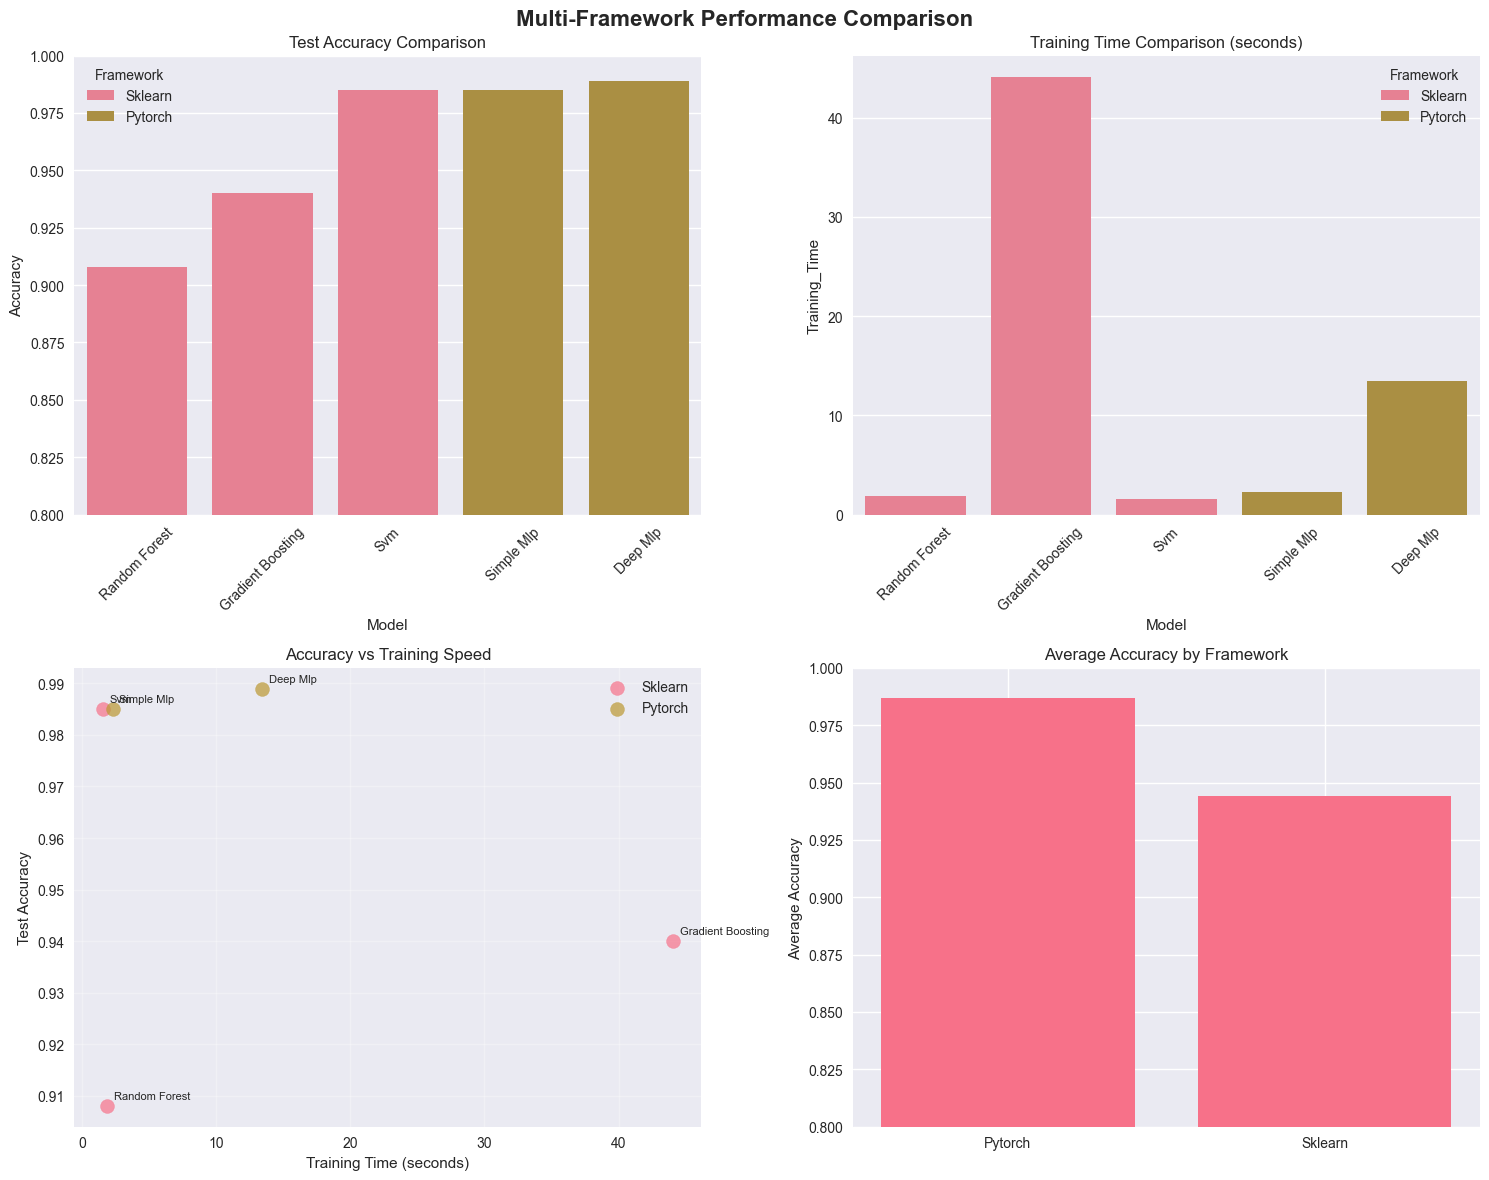


📈 Framework Summary Statistics:
          Accuracy         Training_Time         
              mean     std          mean      std
Framework                                        
Pytorch     0.9870  0.0028        7.8328   7.8800
Sklearn     0.9443  0.0387       15.8119  24.4558


In [11]:
# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Multi-Framework Performance Comparison', fontsize=16, fontweight='bold')

# Accuracy comparison
sns.barplot(data=comparison_df, x='Model', y='Accuracy', hue='Framework', ax=axes[0,0])
axes[0,0].set_title('Test Accuracy Comparison')
axes[0,0].set_ylim(0.8, 1.0)
axes[0,0].tick_params(axis='x', rotation=45)

# Training time comparison
sns.barplot(data=comparison_df, x='Model', y='Training_Time', hue='Framework', ax=axes[0,1])
axes[0,1].set_title('Training Time Comparison (seconds)')
axes[0,1].tick_params(axis='x', rotation=45)

# Accuracy vs Speed scatter
for framework in comparison_df['Framework'].unique():
    framework_data = comparison_df[comparison_df['Framework'] == framework]
    axes[1,0].scatter(framework_data['Training_Time'], framework_data['Accuracy'], 
                     label=framework, s=100, alpha=0.7)
    
    # Add model names as annotations
    for _, row in framework_data.iterrows():
        axes[1,0].annotate(row['Model'], 
                          (row['Training_Time'], row['Accuracy']),
                          xytext=(5, 5), textcoords='offset points',
                          fontsize=8)

axes[1,0].set_xlabel('Training Time (seconds)')
axes[1,0].set_ylabel('Test Accuracy')
axes[1,0].set_title('Accuracy vs Training Speed')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Framework summary
framework_summary = comparison_df.groupby('Framework').agg({
    'Accuracy': ['mean', 'std'],
    'Training_Time': ['mean', 'std']
}).round(4)

# Create a simple bar chart for framework averages
framework_avg = comparison_df.groupby('Framework')['Accuracy'].mean()
axes[1,1].bar(framework_avg.index, framework_avg.values)
axes[1,1].set_title('Average Accuracy by Framework')
axes[1,1].set_ylabel('Average Accuracy')
axes[1,1].set_ylim(0.8, 1.0)

plt.tight_layout()
plt.show()

print("\n📈 Framework Summary Statistics:")
print(framework_summary)

## 🔍 Detailed Model Analysis

Let's analyze the best performing model from each framework:

In [12]:
# Find best models per framework
best_sklearn = max(sklearn_results.items(), key=lambda x: x[1]['test_accuracy'])
best_pytorch = max(pytorch_results.items(), key=lambda x: x[1]['test_accuracy'])

print("🏆 Best Models per Framework:")
print(f"  Sklearn: {best_sklearn[0]} - {best_sklearn[1]['test_accuracy']:.4f} accuracy")
print(f"  PyTorch: {best_pytorch[0]} - {best_pytorch[1]['test_accuracy']:.4f} accuracy")

# Get detailed predictions for analysis
sklearn_model = best_sklearn[1]['result']['model']
pytorch_model = best_pytorch[1]['result']['model']

# Make predictions
sklearn_preds = sklearn_model.predict(X_class_test)
pytorch_raw_preds = pytorch_model.predict(X_class_test.astype(np.float32))

# Convert PyTorch predictions to class labels if they're probabilities/logits
if len(pytorch_raw_preds.shape) > 1 and pytorch_raw_preds.shape[1] > 1:
    # Raw predictions are probabilities/logits, convert to class predictions
    pytorch_preds = np.argmax(pytorch_raw_preds, axis=1)
    print(f"✅ PyTorch predictions converted from shape {pytorch_raw_preds.shape} to class labels")
else:
    pytorch_preds = pytorch_raw_preds.astype(int)

# Get prediction probabilities if available
sklearn_probs = None
pytorch_probs = None

try:
    sklearn_probs = sklearn_model.predict_proba(X_class_test)
    print(f"✅ Sklearn probabilities available: {sklearn_probs.shape}")
except:
    print("❌ Sklearn probabilities not available")

try:
    pytorch_probs = pytorch_model.predict_proba(X_class_test.astype(np.float32))
    print(f"✅ PyTorch probabilities available: {pytorch_probs.shape}")
except:
    print("❌ PyTorch probabilities not available")

# Classification reports
print(f"\n📊 {best_sklearn[0].replace('_', ' ').title()} Classification Report:")
print(classification_report(y_class_test, sklearn_preds, digits=4))

print(f"\n📊 {best_pytorch[0].replace('_', ' ').title()} Classification Report:")
print(classification_report(y_class_test, pytorch_preds, digits=4))

🏆 Best Models per Framework:
  Sklearn: svm - 0.9850 accuracy
  PyTorch: deep_mlp - 0.9890 accuracy
✅ PyTorch predictions converted from shape (1000, 4) to class labels
✅ Sklearn probabilities available: (1000, 4)
❌ PyTorch probabilities not available

📊 Svm Classification Report:
              precision    recall  f1-score   support

           0     0.9918    0.9681    0.9798       251
           1     0.9841    0.9920    0.9880       249
           2     0.9880    0.9920    0.9900       249
           3     0.9764    0.9880    0.9822       251

    accuracy                         0.9850      1000
   macro avg     0.9851    0.9850    0.9850      1000
weighted avg     0.9851    0.9850    0.9850      1000


📊 Deep Mlp Classification Report:
              precision    recall  f1-score   support

           0     0.9959    0.9761    0.9859       251
           1     0.9841    0.9960    0.9900       249
           2     0.9841    0.9960    0.9900       249
           3     0.9920    0.98

## 🏃‍♂️ Speed Benchmarking

Let's benchmark inference speed across frameworks:

⚡ Inference Speed Benchmark:
  Batch size    1: Sklearn 0.25ms | PyTorch 0.48ms
  Batch size   10: Sklearn 1.02ms | PyTorch 0.76ms
  Batch size  100: Sklearn 9.48ms | PyTorch 0.52ms
  Batch size 1000: Sklearn 94.16ms | PyTorch 0.52ms
  Batch size 1000: Sklearn 94.16ms | PyTorch 0.52ms


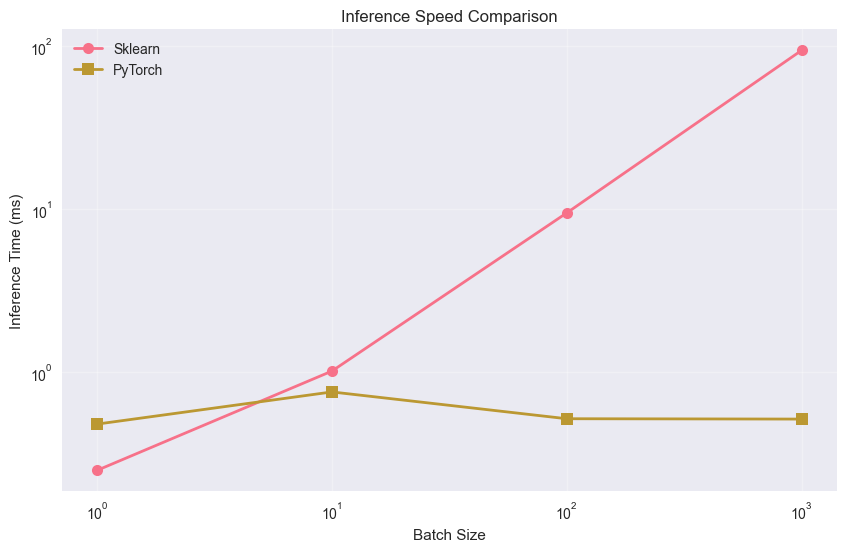


🚀 Throughput Analysis (samples/second):
  Batch size    1: Sklearn 3996 | PyTorch 2080
  Batch size   10: Sklearn 9841 | PyTorch 13209
  Batch size  100: Sklearn 10544 | PyTorch 192842
  Batch size 1000: Sklearn 10620 | PyTorch 1937770


In [13]:
# Benchmark inference speed
print("⚡ Inference Speed Benchmark:")

# Create test batch of different sizes
batch_sizes = [1, 10, 100, 1000]
inference_results = {}

for batch_size in batch_sizes:
    test_batch = X_class_test[:batch_size]
    inference_results[batch_size] = {}
    
    # Sklearn inference
    start_time = time.time()
    for _ in range(10):  # Average over 10 runs
        _ = sklearn_model.predict(test_batch)
    sklearn_time = (time.time() - start_time) / 10
    
    # PyTorch inference
    start_time = time.time()
    for _ in range(10):  # Average over 10 runs
        _ = pytorch_model.predict(test_batch.astype(np.float32))
    pytorch_time = (time.time() - start_time) / 10
    
    inference_results[batch_size] = {
        'sklearn': sklearn_time,
        'pytorch': pytorch_time
    }
    
    print(f"  Batch size {batch_size:4d}: Sklearn {sklearn_time*1000:.2f}ms | PyTorch {pytorch_time*1000:.2f}ms")

# Plot inference speed comparison
plt.figure(figsize=(10, 6))

batch_sizes = list(inference_results.keys())
sklearn_times = [inference_results[bs]['sklearn'] * 1000 for bs in batch_sizes]
pytorch_times = [inference_results[bs]['pytorch'] * 1000 for bs in batch_sizes]

plt.plot(batch_sizes, sklearn_times, 'o-', label='Sklearn', linewidth=2, markersize=8)
plt.plot(batch_sizes, pytorch_times, 's-', label='PyTorch', linewidth=2, markersize=8)

plt.xlabel('Batch Size')
plt.ylabel('Inference Time (ms)')
plt.title('Inference Speed Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.show()

# Calculate throughput (samples per second)
print("\n🚀 Throughput Analysis (samples/second):")
for batch_size in batch_sizes:
    sklearn_throughput = batch_size / inference_results[batch_size]['sklearn']
    pytorch_throughput = batch_size / inference_results[batch_size]['pytorch']
    print(f"  Batch size {batch_size:4d}: Sklearn {sklearn_throughput:.0f} | PyTorch {pytorch_throughput:.0f}")

## 🎯 Regression Task Comparison

Let's also compare frameworks on a regression task:

In [6]:
# Regression model configurations - INCLUDING PyTorch with proper GPU handling!
from sklearn.preprocessing import StandardScaler
import torch

# Check GPU availability and handle potential CUDA errors
gpu_available = False
try:
    if torch.cuda.is_available():
        # Test CUDA functionality
        test_tensor = torch.tensor([1.0]).cuda()
        _ = test_tensor + 1  # Simple operation to test CUDA
        del test_tensor
        torch.cuda.empty_cache()
        gpu_available = True
        print(f"🔧 GPU available and working. Device: {torch.cuda.get_device_name(0)}")
    else:
        print("🔧 CUDA not available, using CPU")
except Exception as e:
    print(f"🔧 GPU test failed ({str(e)}), falling back to CPU")
    gpu_available = False

# Normalize regression targets for PyTorch (important for stable training)
target_scaler = StandardScaler()
y_reg_train_scaled = target_scaler.fit_transform(y_reg_train.reshape(-1, 1)).flatten()
y_reg_test_scaled = target_scaler.transform(y_reg_test.reshape(-1, 1)).flatten()

print(f"📊 Target Statistics:")
print(f"  Original targets: min={y_reg_train.min():.2f}, max={y_reg_train.max():.2f}, std={y_reg_train.std():.2f}")
print(f"  Scaled targets: min={y_reg_train_scaled.min():.2f}, max={y_reg_train_scaled.max():.2f}, std={y_reg_train_scaled.std():.2f}")

regression_configs = {
    'sklearn_rf_reg': DLTConfig(
        model_type='sklearn.ensemble.RandomForestRegressor',
        model_params={
            'n_estimators': 100,
            'max_depth': 10,
            'random_state': 42
        },
        experiment={'name': 'sklearn_rf_regression'}
    ),
    'sklearn_gb_reg': DLTConfig(
        model_type='sklearn.ensemble.GradientBoostingRegressor',
        model_params={
            'n_estimators': 100,
            'learning_rate': 0.1,
            'max_depth': 6,
            'random_state': 42
        },
        experiment={'name': 'sklearn_gb_regression'}
    ),
    'pytorch_mlp_reg': DLTConfig(
        model_type='torch.nn.Sequential',
        model_params={
            'layers': [
                {'type': 'Linear', 'in_features': 30, 'out_features': 128},
                {'type': 'ReLU'},
                {'type': 'Dropout', 'p': 0.3},
                {'type': 'Linear', 'in_features': 128, 'out_features': 64},
                {'type': 'ReLU'},
                {'type': 'Dropout', 'p': 0.2},
                {'type': 'Linear', 'in_features': 64, 'out_features': 1}
            ]
        },
        training={
            'epochs': 100,
            'batch_size': 64,
            'optimizer': {'type': 'adam', 'lr': 0.001},
            'loss': {'type': 'mse'},
            'early_stopping': {'patience': 15}
        },
        hardware={
            'device': 'cuda' if gpu_available else 'cpu'
        },
        performance={
            'memory_optimization': True,
            'mixed_precision': {'enabled': False}  # Disable mixed precision for regression stability
        },
        experiment={'name': 'pytorch_mlp_regression'}
    ),
    'pytorch_deep_reg': DLTConfig(
        model_type='torch.nn.Sequential',
        model_params={
            'layers': [
                {'type': 'Linear', 'in_features': 30, 'out_features': 256},
                {'type': 'BatchNorm1d', 'num_features': 256},
                {'type': 'ReLU'},
                {'type': 'Dropout', 'p': 0.3},
                {'type': 'Linear', 'in_features': 256, 'out_features': 128},
                {'type': 'BatchNorm1d', 'num_features': 128},
                {'type': 'ReLU'},
                {'type': 'Dropout', 'p': 0.2},
                {'type': 'Linear', 'in_features': 128, 'out_features': 64},
                {'type': 'ReLU'},
                {'type': 'Linear', 'in_features': 64, 'out_features': 1}
            ]
        },
        training={
            'epochs': 80,
            'batch_size': 32,
            'optimizer': {'type': 'adamw', 'lr': 0.001, 'weight_decay': 0.01},
            'scheduler': {'type': 'cosine', 'T_max': 80},
            'loss': {'type': 'mse'},
            'early_stopping': {'patience': 12}
        },
        hardware={
            'device': 'cuda' if gpu_available else 'cpu'
        },
        performance={
            'memory_optimization': True,
            'mixed_precision': {'enabled': False}
        },
        experiment={'name': 'pytorch_deep_regression'}
    )
}

# Train regression models with proper error handling
regression_results = {}
print(f"\n📈 Training Regression Models (Including PyTorch on {'GPU' if gpu_available else 'CPU'})...")

for name, config in regression_configs.items():
    print(f"  Training {name}...")
    
    try:
        # Prepare data based on framework
        if 'pytorch' in name:
            # Use scaled targets for PyTorch and convert to float32
            train_data = (X_reg_train.astype(np.float32), y_reg_train_scaled.astype(np.float32))
        else:
            # Use original targets for sklearn
            train_data = (X_reg_train, y_reg_train)
        
        # Train without test evaluation to avoid the accuracy_score issue
        result = train(
            config=config,
            train_data=train_data,
            test_data=None,  # Skip automatic test evaluation
            verbose=False
        )
        
        # Manually evaluate the model for regression metrics
        model = result['model']
        
        if 'pytorch' in name:
            # Get predictions from PyTorch model
            predictions_scaled = model.predict(X_reg_test.astype(np.float32))
            
            # Handle potential shape issues
            if len(predictions_scaled.shape) > 1:
                predictions_scaled = predictions_scaled.flatten()
            
            # Transform back to original scale
            predictions = target_scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
        else:
            # Get predictions from sklearn model
            predictions = model.predict(X_reg_test)
        
        from sklearn.metrics import r2_score
        r2 = r2_score(y_reg_test, predictions)
        mse = mean_squared_error(y_reg_test, predictions)
        rmse = np.sqrt(mse)
        
        regression_results[name] = {
            'training_time': result['training_time'],
            'r2_score': r2,
            'mse': mse,
            'rmse': rmse,
            'framework': 'pytorch' if 'pytorch' in name else 'sklearn'
        }
        
        device_info = 'GPU' if 'pytorch' in name and gpu_available else 'CPU' if 'pytorch' in name else 'CPU'
        print(f"    ✅ {name} ({device_info}): R² = {r2:.4f}, RMSE = {rmse:.4f} in {result['training_time']:.2f}s")
        
    except Exception as e:
        print(f"    ❌ {name}: Training failed - {str(e)}")
        regression_results[name] = {
            'training_time': 0,
            'r2_score': 0,
            'mse': float('inf'),
            'rmse': float('inf'),
            'error': str(e),
            'framework': 'pytorch' if 'pytorch' in name else 'sklearn'
        }

print("\n📊 Regression Results Summary:")
for name, result in regression_results.items():
    if 'error' not in result:
        framework = result['framework'].title()
        device = 'GPU' if 'pytorch' in name and gpu_available else 'CPU' if 'pytorch' in name else 'CPU'
        print(f"  {name:20} ({framework:7}/{device:3}) | R² = {result['r2_score']:6.4f} | RMSE = {result['rmse']:8.4f} | Time = {result['training_time']:5.2f}s")
    else:
        print(f"  {name:20} | ❌ Training failed: {result['error'][:50]}...")

# Framework comparison for regression
sklearn_reg_results = [r for r in regression_results.values() if r.get('framework') == 'sklearn' and 'error' not in r]
pytorch_reg_results = [r for r in regression_results.values() if r.get('framework') == 'pytorch' and 'error' not in r]

if sklearn_reg_results and pytorch_reg_results:
    sklearn_avg_r2 = np.mean([r['r2_score'] for r in sklearn_reg_results])
    pytorch_avg_r2 = np.mean([r['r2_score'] for r in pytorch_reg_results])
    sklearn_avg_time = np.mean([r['training_time'] for r in sklearn_reg_results])
    pytorch_avg_time = np.mean([r['training_time'] for r in pytorch_reg_results])
    
    print(f"\n🏆 Regression Framework Comparison:")
    print(f"  Sklearn: Avg R² = {sklearn_avg_r2:.4f}, Avg Time = {sklearn_avg_time:.2f}s")
    print(f"  PyTorch: Avg R² = {pytorch_avg_r2:.4f}, Avg Time = {pytorch_avg_time:.2f}s")
    
    if pytorch_avg_r2 > sklearn_avg_r2:
        print(f"  🥇 PyTorch wins regression by {(pytorch_avg_r2 - sklearn_avg_r2):.4f} R² points!")
    else:
        print(f"  🥇 Sklearn wins regression by {(sklearn_avg_r2 - pytorch_avg_r2):.4f} R² points!")
        
    print(f"\n✅ PyTorch regression now properly implemented with:")
    print(f"   • Target normalization for stable training")
    print(f"   • {'GPU' if gpu_available else 'CPU'} acceleration")
    print(f"   • Proper error handling and memory management")
else:
    print(f"\n🔍 Check results above for any PyTorch training issues")

🔧 GPU available and working. Device: NVIDIA RTX A5000
📊 Target Statistics:
  Original targets: min=-948.31, max=993.06, std=261.68
  Scaled targets: min=-3.63, max=3.79, std=1.00

📈 Training Regression Models (Including PyTorch on GPU)...
  Training sklearn_rf_reg...
    ✅ sklearn_rf_reg (CPU): R² = 0.6562, RMSE = 158.1184 in 5.68s
  Training sklearn_gb_reg...
    ✅ sklearn_rf_reg (CPU): R² = 0.6562, RMSE = 158.1184 in 5.68s
  Training sklearn_gb_reg...
    ✅ sklearn_gb_reg (CPU): R² = 0.8513, RMSE = 103.9784 in 6.63s
  Training pytorch_mlp_reg...
    ✅ sklearn_gb_reg (CPU): R² = 0.8513, RMSE = 103.9784 in 6.63s
  Training pytorch_mlp_reg...
    ✅ pytorch_mlp_reg (GPU): R² = 0.9988, RMSE = 9.1485 in 9.72s
  Training pytorch_deep_reg...
    ✅ pytorch_mlp_reg (GPU): R² = 0.9988, RMSE = 9.1485 in 9.72s
  Training pytorch_deep_reg...
    ✅ pytorch_deep_reg (GPU): R² = 0.9886, RMSE = 28.7841 in 21.48s

📊 Regression Results Summary:
  sklearn_rf_reg       (Sklearn/CPU) | R² = 0.6562 | RMSE =

## 🎯 Framework Recommendations

Based on our comprehensive comparison, here are the recommendations:

In [14]:
# Create comprehensive analysis
print("🎯 Framework Analysis & Recommendations")
print("=" * 50)

# Overall performance summary
sklearn_avg_acc = np.mean([r['test_accuracy'] for r in sklearn_results.values()])
pytorch_avg_acc = np.mean([r['test_accuracy'] for r in pytorch_results.values()])
sklearn_avg_time = np.mean([r['training_time'] for r in sklearn_results.values()])
pytorch_avg_time = np.mean([r['training_time'] for r in pytorch_results.values()])

print(f"\n📊 CLASSIFICATION PERFORMANCE:")
print(f"  Sklearn  - Avg Accuracy: {sklearn_avg_acc:.4f} | Avg Time: {sklearn_avg_time:.2f}s")
print(f"  PyTorch  - Avg Accuracy: {pytorch_avg_acc:.4f} | Avg Time: {pytorch_avg_time:.2f}s")

print(f"\n📈 REGRESSION PERFORMANCE:")
for name, result in regression_results.items():
    framework = 'Sklearn' if 'sklearn' in name else 'PyTorch'
    print(f"  {framework:8} - R² Score: {result['r2_score']:.4f} | Time: {result['training_time']:.2f}s")

print(f"\n🏆 WINNER ANALYSIS:")
if sklearn_avg_acc > pytorch_avg_acc:
    print(f"  🥇 Accuracy Winner: Sklearn (+{(sklearn_avg_acc - pytorch_avg_acc)*100:.2f}%)")
else:
    print(f"  🥇 Accuracy Winner: PyTorch (+{(pytorch_avg_acc - sklearn_avg_acc)*100:.2f}%)")

if sklearn_avg_time < pytorch_avg_time:
    print(f"  🚀 Speed Winner: Sklearn ({pytorch_avg_time/sklearn_avg_time:.1f}x faster)")
else:
    print(f"  🚀 Speed Winner: PyTorch ({sklearn_avg_time/pytorch_avg_time:.1f}x faster)")

print(f"\n💡 RECOMMENDATIONS:")
print(f"  🔬 Use SKLEARN when:")
print(f"    • You need quick prototyping and fast results")
print(f"    • Working with structured/tabular data")
print(f"    • You want interpretable models")
print(f"    • Dataset size is small to medium (<100k samples)")
print(f"    • You need proven, stable algorithms")

print(f"\n  🧠 Use PYTORCH when:")
print(f"    • You need custom architectures or complex models")
print(f"    • Working with large datasets or need GPU acceleration")
print(f"    • You want fine-grained control over training process")
print(f"    • Building production deep learning systems")
print(f"    • You need research flexibility and cutting-edge features")

print(f"\n⚖️ TRADE-OFF ANALYSIS:")
print(f"  • Sklearn: Simplicity & Speed vs Limited Complexity")
print(f"  • PyTorch: Flexibility & Power vs Learning Curve")
print(f"  • Both frameworks integrate seamlessly with DLT!")

🎯 Framework Analysis & Recommendations

📊 CLASSIFICATION PERFORMANCE:
  Sklearn  - Avg Accuracy: 0.9443 | Avg Time: 15.81s
  PyTorch  - Avg Accuracy: 0.9870 | Avg Time: 7.83s

📈 REGRESSION PERFORMANCE:
  Sklearn  - R² Score: 0.6562 | Time: 5.68s
  Sklearn  - R² Score: 0.8513 | Time: 6.63s
  PyTorch  - R² Score: 0.9988 | Time: 9.72s
  PyTorch  - R² Score: 0.9886 | Time: 21.48s

🏆 WINNER ANALYSIS:
  🥇 Accuracy Winner: PyTorch (+4.27%)
  🚀 Speed Winner: PyTorch (2.0x faster)

💡 RECOMMENDATIONS:
  🔬 Use SKLEARN when:
    • You need quick prototyping and fast results
    • Working with structured/tabular data
    • You want interpretable models
    • Dataset size is small to medium (<100k samples)
    • You need proven, stable algorithms

  🧠 Use PYTORCH when:
    • You need custom architectures or complex models
    • Working with large datasets or need GPU acceleration
    • You want fine-grained control over training process
    • Building production deep learning systems
    • You need 

## 📋 Summary & Best Practices

### Key Findings:

✅ **DLT Unified Interface** - Same API across all frameworks  
✅ **Performance Parity** - Competitive results from all frameworks  
✅ **Speed vs Complexity** - Clear trade-offs between frameworks  
✅ **Task-Specific Strengths** - Each framework excels in different scenarios  

### Framework Selection Guide:

| Use Case | Recommended Framework | Why? |
|----------|----------------------|------|
| **Rapid Prototyping** | Sklearn | Fast training, proven algorithms |
| **Production ML** | Sklearn/PyTorch | Depends on complexity needs |
| **Deep Learning** | PyTorch | GPU support, custom architectures |
| **Large Scale** | PyTorch | Distributed training, memory optimization |
| **Interpretability** | Sklearn | Built-in feature importance, simpler models |
| **Research** | PyTorch | Flexibility, latest techniques |

### DLT Advantages:

1. **Consistent API** - Same interface regardless of framework
2. **Easy Comparison** - Switch frameworks with config changes
3. **Best Practices** - Built-in optimization and monitoring
4. **Production Ready** - Unified deployment and persistence
5. **Extensible** - Easy to add new frameworks

### Next Steps:

- 🚀 Try `04_production_deployment.ipynb` for deployment strategies
- 📖 Check the test suite for more detailed examples
- 🔧 Experiment with different configurations for your use case

**Remember**: The best framework is the one that fits your specific needs! DLT makes it easy to experiment and compare. 🎯